In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CONSTANTS!!!

# STEP 1 - Load and visualize data
dataInputPath = '/content/drive/MyDrive/data/volumes/'
imagePathInput = os.path.join(dataInputPath, 'X_train_input/')
maskPathInput = os.path.join(dataInputPath, 'Y_train_target/')

dataOutputPath = '/content/drive/MyDrive/data/slices/'
imageSliceOutput = os.path.join(dataOutputPath, 'img/')
maskSliceOutput = os.path.join(dataOutputPath, 'mask/')

# STEP 2 - Image normalization
HOUNSFIELD_MIN = 0
HOUNSFIELD_MAX = 2000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3

In [4]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput, 'sub-r049s033_ses-1_T1w.nii')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(0.0, 1944.0, (96, 160, 160), numpy.memmap)

In [5]:
# Load image mask and see max min Hounsfield units
maskPath = os.path.join(maskPathInput, 'sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask)

(0.0, 1.0, (173, 213, 181), numpy.memmap)

values are from 0 and 1 

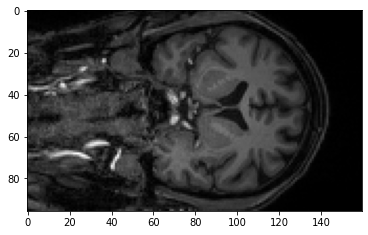

In [6]:
# Show image slice
imgSlice = img[:,100,:]
plt.imshow(imgSlice, cmap="gray")
plt.show()

In [7]:
# Normalize image
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)

(0.0, 0.972, (96, 160, 160), numpy.ndarray)

In [8]:
# Read image or mask volume
def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgPath, normalize=True)
readImageVolume(maskPath, normalize=False)

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [11]:
# Save volume slice to file (test)
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [12]:
saveSlice(nImg[20,:,:], 'test', imageSliceOutput)
saveSlice(mask[20,:,:], 'test', maskSliceOutput)

In [13]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)
            
    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [ ]:
# Read and process image volumes
for index, filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii'))):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'brain'+str(index), imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s001_ses-1_T1w.nii (173, 213, 181) 567 0.0 1.0
173 213 181
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/slices/img/brain0-slice212_y.png
/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s001_ses-1_T1w.nii, 386 slices created 

/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s002_ses-1_T1w.nii (174, 227, 155) 556 0.0 1.0
174 227 155
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/slices/img/brain1-slice226_y.png
/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s002_ses-1_T1w.nii, 401 slices created 

/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s003_ses-1_T1w.nii (168, 225, 197) 590 0.0 1.0
168 225 197
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/slices/img/brain2-slice224_y.png
/content/drive/MyDrive/data/volumes/X_train_input/sub-r001s003_ses-1_T1w.nii, 393 slices created 

/content/drive/MyDrive/data/volumes/X_train_in

In [ ]:
# Read and process image mask volumes
for index, filename in enumerate(sorted(glob.iglob(maskPathInput+'*.nii'))):
    img = readImageVolume(filename, False)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'brain'+str(index), maskSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/content/drive/MyDrive/data/volumes/Y_train_target/sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii (173, 213, 181) 567 0.0 1.0
173 213 181
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/slices/mask/brain0-slice212_y.png
/content/drive/MyDrive/data/volumes/Y_train_target/sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii, 386 slices created 

/content/drive/MyDrive/data/volumes/Y_train_target/sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii (174, 227, 155) 556 0.0 1.0
174 227 155
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/slices/mask/brain1-slice226_y.png
/content/drive/MyDrive/data/volumes/Y_train_target/sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii, 401 slices created 

/content/drive/MyDrive/data/volumes/Y_train_target/sub-r001s003_ses-1_space-orig_label-L_desc-T1lesion_mask.nii (168, 225, 197) 590 0.0 1.0
168 225 197
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/data/s